In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("../data/vertebral_column_data/column_2C.dat", delim_whitespace=True, header=None)
print(df)
print(df.columns)
fe = [
    "pelvic_incidence", 
    "pelvic_tilt", 
    "lumbar_lordosis_angle", 
    "sacral_slope", 
    "pelvic_radius", 
    "degree_spondylolisthesis"
]


lb = "class"  
df.columns = fe + [lb]  
df[lb] = df[lb].map({"NO": 0, "AB": 1})


X = df[fe].values
y = df[lb].values


         0      1      2      3       4      5   6
0    63.03  22.55  39.61  40.48   98.67  -0.25  AB
1    39.06  10.06  25.02  29.00  114.41   4.56  AB
2    68.83  22.22  50.09  46.61  105.99  -3.53  AB
3    69.30  24.65  44.31  44.64  101.87  11.21  AB
4    49.71   9.65  28.32  40.06  108.17   7.92  AB
..     ...    ...    ...    ...     ...    ...  ..
305  47.90  13.62  36.00  34.29  117.45  -4.25  NO
306  53.94  20.72  29.22  33.22  114.37  -0.42  NO
307  61.45  22.69  46.17  38.75  125.67  -2.71  NO
308  45.25   8.69  41.58  36.56  118.55   0.21  NO
309  33.84   5.07  36.64  28.77  123.95  -0.20  NO

[310 rows x 7 columns]
Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


/var/folders/vf/65jq23rs2vx7wt_9316qjfm00000gn/T/ipykernel_95768/884343549.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/vertebral_column_data/column_2C.dat", delim_whitespace=True, header=None)


In [4]:
df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


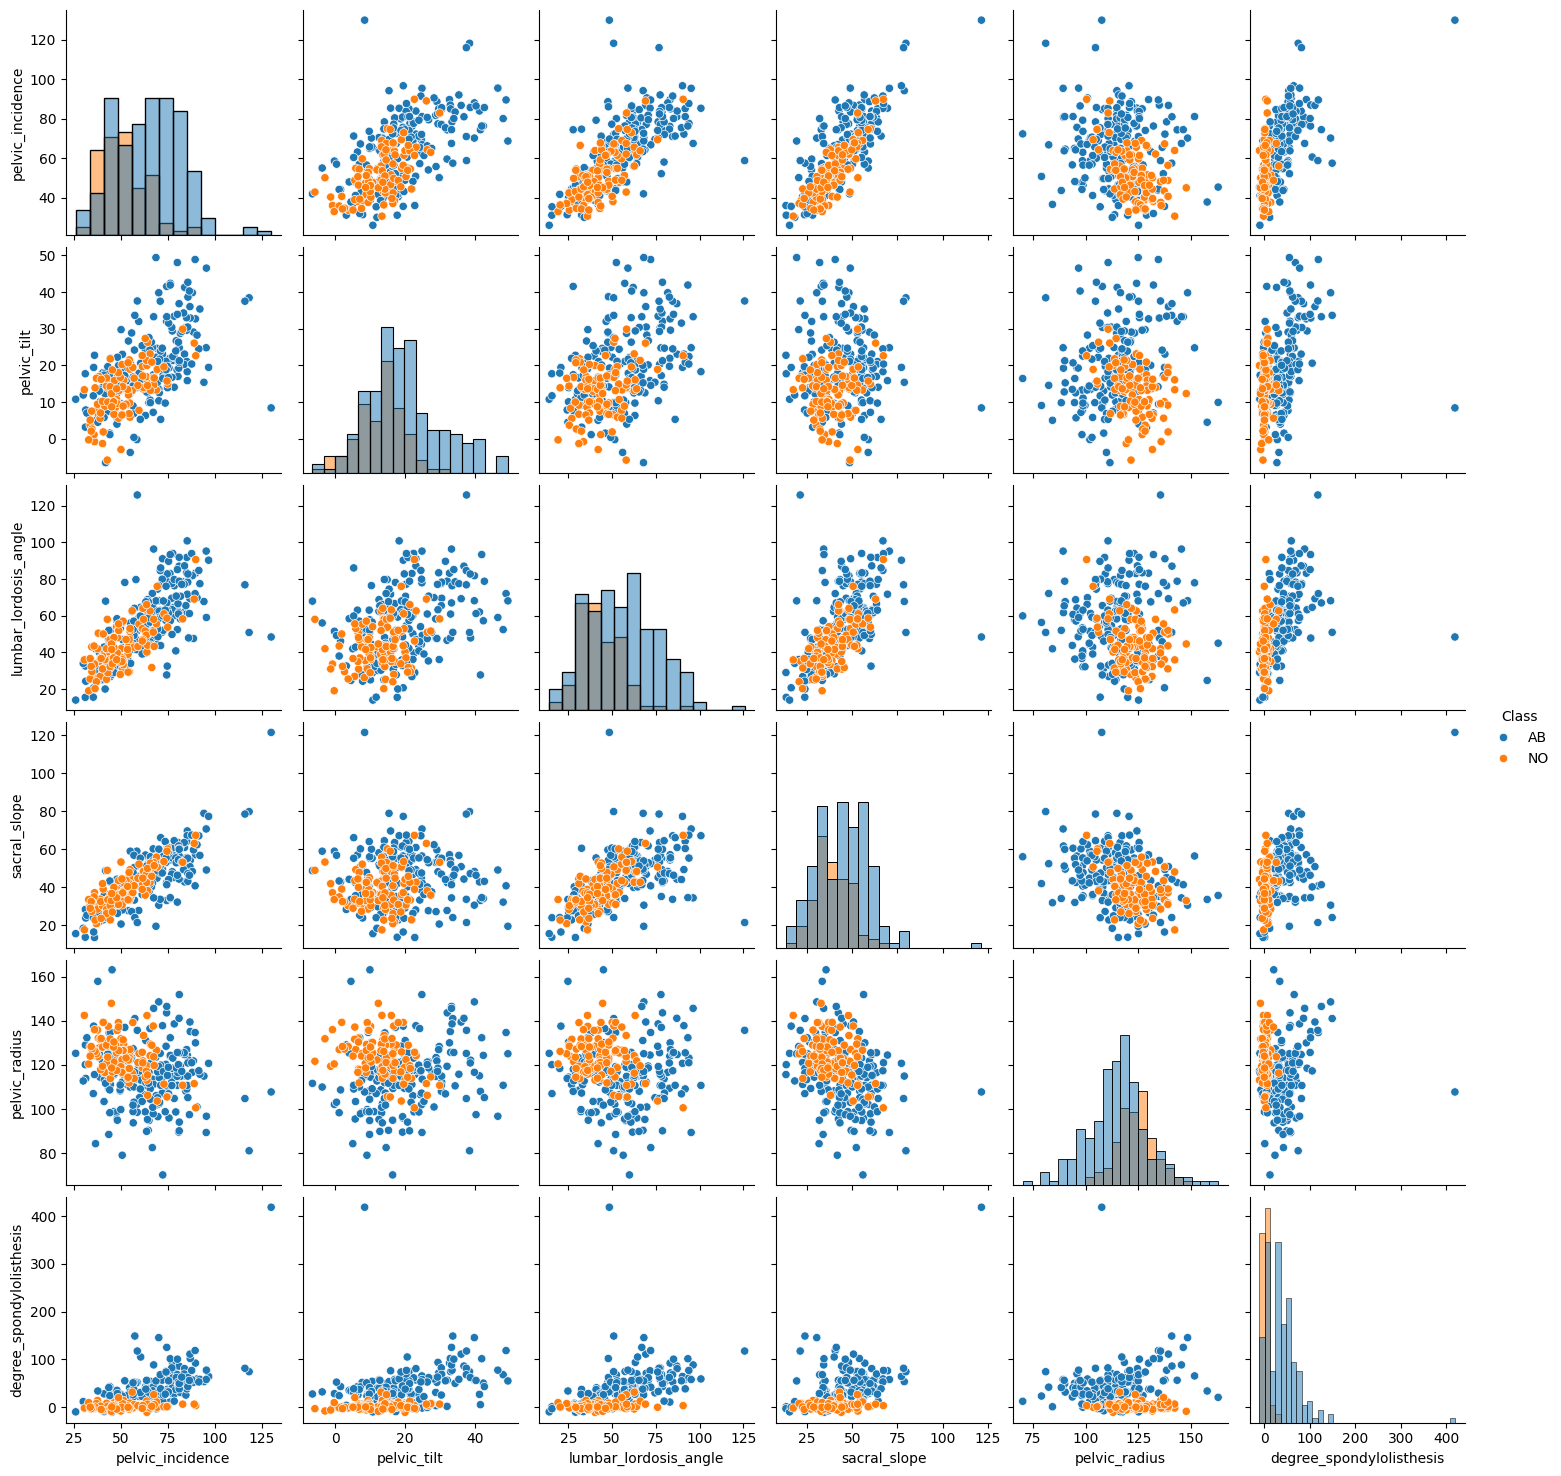

In [5]:

df2 = df.copy()
df2['Class'] = df2[lb].map({0:'NO', 1:'AB'})
sns.pairplot(df2, vars=fe, hue='Class', diag_kind='hist')
plt.show()


/var/folders/vf/65jq23rs2vx7wt_9316qjfm00000gn/T/ipykernel_95768/2351747901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=lb, y=col, ax=ax[i], palette="Set2")
/var/folders/vf/65jq23rs2vx7wt_9316qjfm00000gn/T/ipykernel_95768/2351747901.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(["NO (0)","AB (1)"])
/var/folders/vf/65jq23rs2vx7wt_9316qjfm00000gn/T/ipykernel_95768/2351747901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=lb, y=col, ax=ax[i], palette="Set2")
/var/folders/vf/65jq23rs2vx7wt_9316qjfm00000gn/T/ipykernel_95768/2351747901.py:6: UserWarni

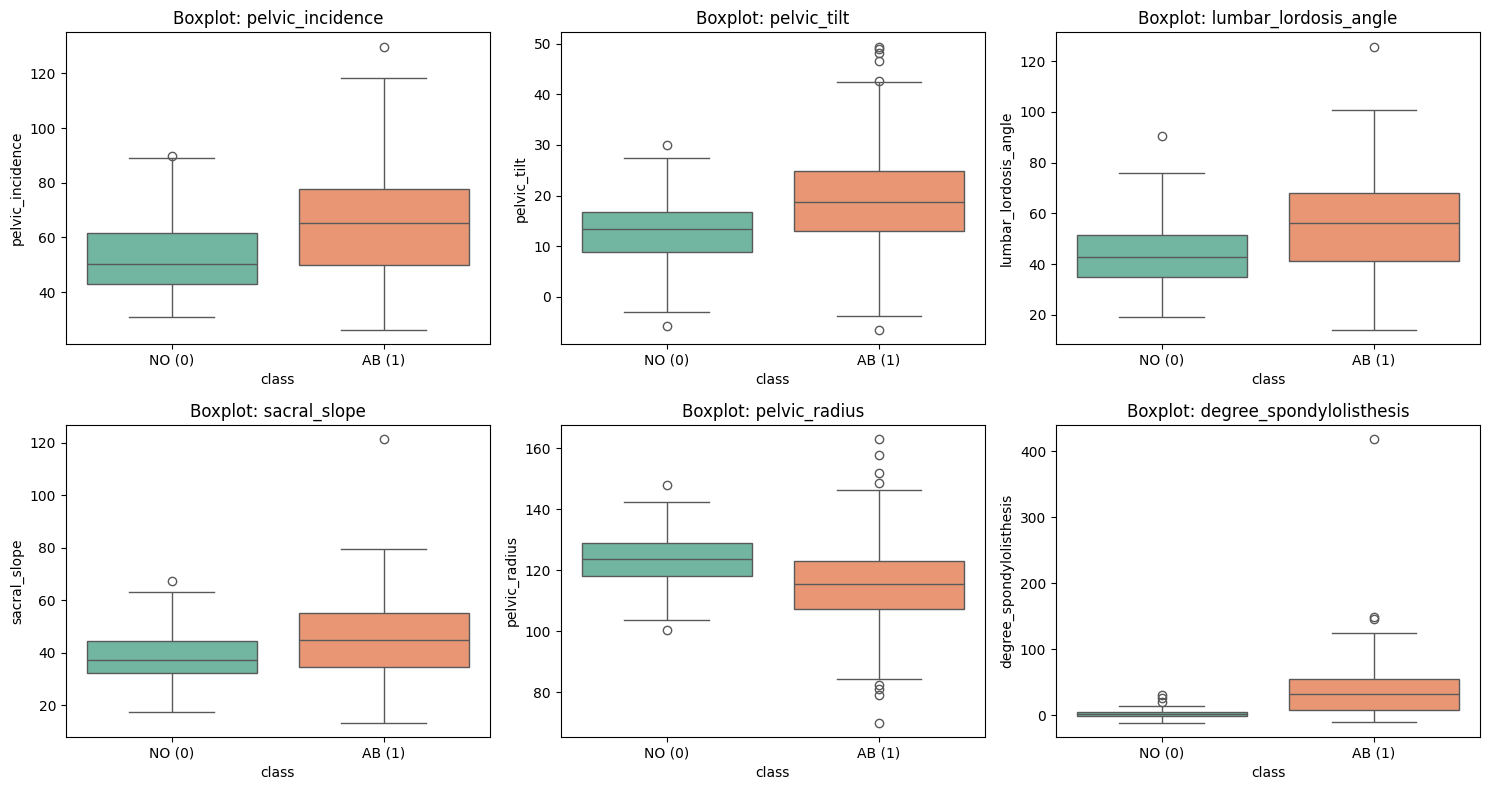

In [7]:
figuree, ax = plt.subplots(2, 3, figsize=(15, 8))
ax = ax.ravel()

for i, col in enumerate(fe):
    sns.boxplot(data=df, x=lb, y=col, ax=ax[i], palette="Set2")
    ax[i].set_xticklabels(["NO (0)","AB (1)"])
    ax[i].set_title(f"Boxplot: {col}")
    
plt.tight_layout()
plt.show()


In [9]:

dataframe_n = df[df[lb] == 0].copy()
data_frame_ab = df[df[lb] == 1].copy()

dataframe_n = dataframe_n.sort_index()
data_frame_ab = data_frame_ab.sort_index()

train_no = dataframe_n.iloc[:70, :]
train_ab = data_frame_ab.iloc[:140, :]
test_no  = dataframe_n.iloc[70:, :]
test_ab  = data_frame_ab.iloc[140:, :]

train_df = pd.concat([train_no, train_ab], axis=0)
test_df  = pd.concat([test_no, test_ab], axis=0)

X_train = train_df[fe].values
y_train = train_df[lb].values
X_test  = test_df[fe].values
y_test  = test_df[lb].values


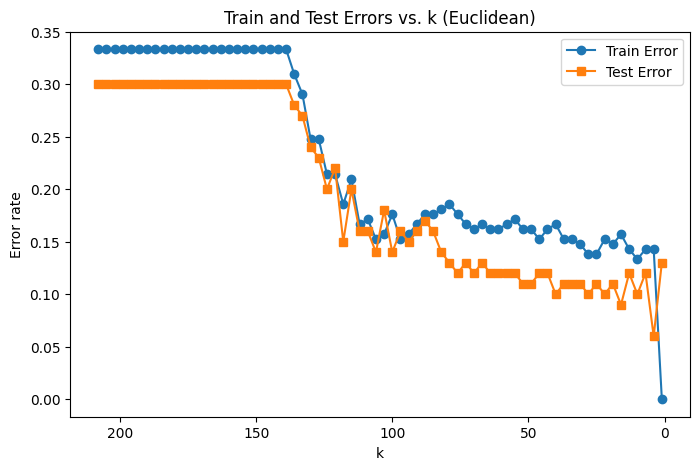

Best k = 4 with test error = 0.060


In [10]:
from sklearn.metrics import accuracy_score

k_values = list(range(208, 0, -3))
train_errors = []
test_errors = []

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test  = clf.predict(X_test)
    
    train_err = 1 - accuracy_score(y_train, y_pred_train)
    test_err  = 1 - accuracy_score(y_test, y_pred_test)
    
    train_errors.append(train_err)
    test_errors.append(test_err)

plt.figure(figsize=(8,5))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='s')
plt.gca().invert_xaxis()  
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Train and Test Errors vs. k (Euclidean)')
plt.legend()
plt.show()

best_idx = np.argmin(test_errors)
k_star = k_values[best_idx]
best_test_err = test_errors[best_idx]
print(f"Best k = {k_star} with test error = {best_test_err:.3f}")


In [11]:
best_knn = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean')
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix:")
print(cm)

accuracy  = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp) if (tp+fp)>0 else 0
recall    = tp / (tp + fn) if (tp+fn)>0 else 0  # TPR
specificity = tn / (tn + fp) if (tn+fp)>0 else 0  # TNR
f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0

print(f"Accuracy : {accuracy:.3f}")
print(f"TPR (Recall) : {recall:.3f}")
print(f"TNR (Specificity) : {specificity:.3f}")
print(f"Precision : {precision:.3f}")
print(f"F1-score : {f1:.3f}")


Confusion matrix:
[[25  5]
 [ 1 69]]
Accuracy : 0.940
TPR (Recall) : 0.986
TNR (Specificity) : 0.833
Precision : 0.932
F1-score : 0.958


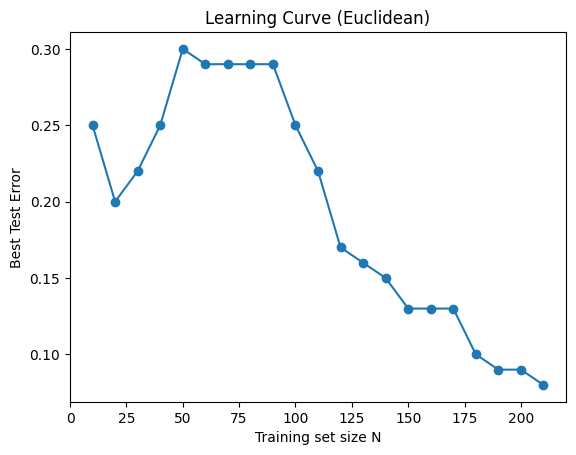

In [13]:
def make_subset(df_no_full, df_ab_full, N):
    n_no = N // 3  # integer division
    n_ab = N - n_no
    subset_no = df_no_full.iloc[:n_no, :]
    subset_ab = df_ab_full.iloc[:n_ab, :]
    return pd.concat([subset_no, subset_ab], axis=0)

N_values = range(10, 211, 10)
test_errors_for_N = []

for N in N_values:
   
    sub_train_df = make_subset(train_no, train_ab, N)
    X_sub_train = sub_train_df[fe].values
    y_sub_train = sub_train_df[lb].values
    
 
    possible_ks = list(range(1, N+1, 5))  # 1,6,11,...
    
    best_err = 1.0
    for k in possible_ks:

        if k > len(X_sub_train):
            continue
        
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(X_sub_train, y_sub_train)
        y_pred = model.predict(X_test)
        err = 1 - accuracy_score(y_test, y_pred)
        if err < best_err:
            best_err = err
    
    test_errors_for_N.append(best_err)

# Plot the learning curve
plt.figure()
plt.plot(N_values, test_errors_for_N, marker='o')
plt.xlabel('Training set size N')
plt.ylabel('Best Test Error')
plt.title('Learning Curve (Euclidean)')
plt.show()


In [14]:
def best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric, possible_ks,
    weights='uniform',
    metric_kwargs=None
):
    if metric_kwargs is None:
        metric_kwargs = {}
    
    best_error = 1.0
    best_k = None
    best_model = None
    
    for k in possible_ks:
      
        if k > len(X_train):
            continue
        
        knn = KNeighborsClassifier(
            n_neighbors=k,
            metric=metric,
            weights=weights,
            metric_params=metric_kwargs  # for scikit-learn metric-specific parameters
        )
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        err = 1 - accuracy_score(y_test, y_pred)
        
        if err < best_error:
            best_error = err
            best_k = k
            best_model = knn
    
    return best_k, best_error, best_model
k_man, err_man, model_man = best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric='minkowski',
    possible_ks=possible_ks,
    metric_kwargs={'p': 1}  
)
print(f"[Manhattan] Best k={k_man}, test error={err_man:.3f}")


k_cheb, err_cheb, model_cheb = best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric='chebyshev',
    possible_ks=possible_ks
)
print(f"[Chebyshev] Best k={k_cheb}, test error={err_cheb:.3f}")



/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/

[Manhattan] Best k=6, test error=0.110
[Chebyshev] Best k=16, test error=0.080


In [15]:

mat_ca = np.cov(X_train, rowvar=False)
inv_cov_mat = np.linalg.inv(mat_ca)

k_mah, err_mah, model_mah = best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric='mahalanobis',
    possible_ks=possible_ks,
    metric_kwargs={"VI": inv_cov_mat}  
)
print(f"Mahalanobis Best k={k_mah}, test error={err_mah:.3f}")


Mahalanobis Best k=1, test error=0.170


In [16]:

k_w_euc, err_w_euc, model_w_euc = best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric='euclidean',
    possible_ks=possible_ks,
    weights='distance'
)
print(f"W Euclidean k={k_w_euc}, test_error={err_w_euc:.3f}")

W Euclidean k=6, test_error=0.100


In [17]:

k_w_man, err_w_man, model_w_man = best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric='minkowski',
    possible_ks=possible_ks,
    weights='distance',
    metric_kwargs={'p':1}
)
print(f"W Manhattan k={k_w_man}, test_error={err_w_man:.3f}")

W Manhattan k=26, test_error=0.100


/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/Users/shree/.pyenv/versions/3.12.8/lib/

In [18]:
# Weighted + Chebyshev
kcheb, errwch, model_w_cheb = best_knn_error_for_metric(
    X_train, y_train, X_test, y_test,
    metric='chebyshev',
    possible_ks=possible_ks,
    weights='distance'
)
print(f"W Chebyshev k={kcheb}, test_error={errwch:.3f}")

W Chebyshev k=16, test_error=0.110
